In [41]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [42]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import opendatasets as od
import pandas

file_path = "https://www.kaggle.com/competitions/customer-segmentation-clustering/data"

od.download(file_path)

Skipping, found downloaded files in "./customer-segmentation-clustering" (use force=True to force download)


In [44]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

from matplotlib import pyplot as plt

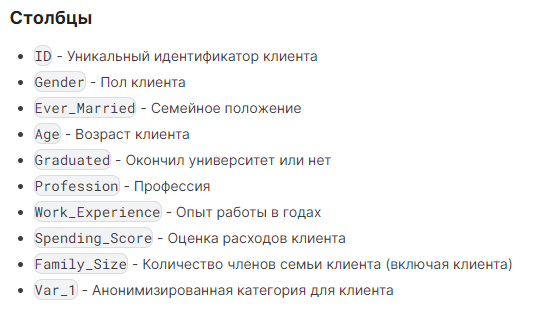

In [45]:
df = pd.read_csv('./customer-segmentation-clustering/customer_dataset.csv')

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


## **Посмотрим данные**

In [46]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

<ipython-input-47-6813088953f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[df.notna()].corr(), annot=True)


<Axes: >

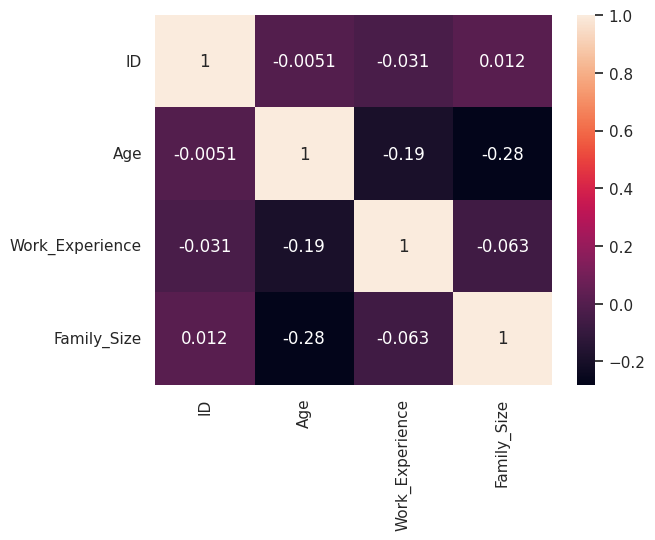

In [47]:
sns.heatmap(df[df.notna()].corr(), annot=True) 

<Axes: xlabel='Var_1', ylabel='count'>

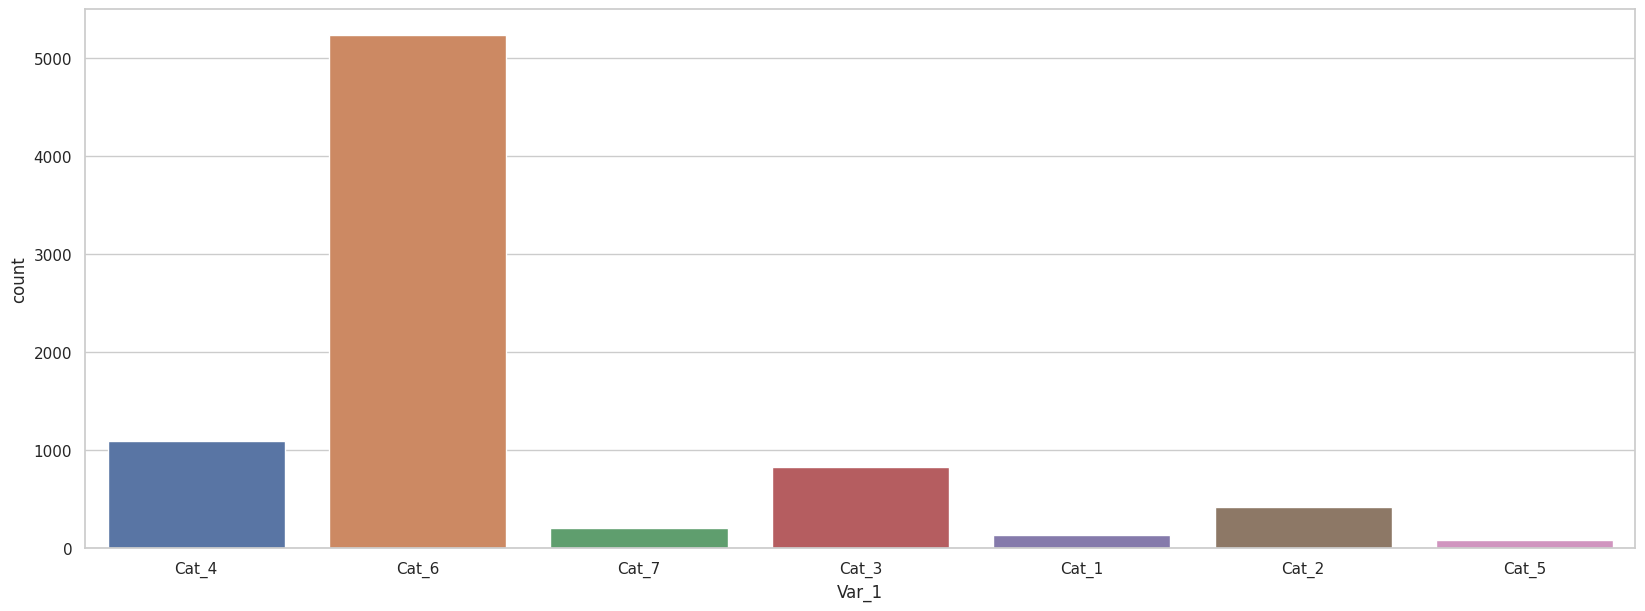

In [48]:
plt.figure(figsize=(20, 7))
sns.countplot(x=df.Var_1)

<Axes: xlabel='Profession', ylabel='count'>

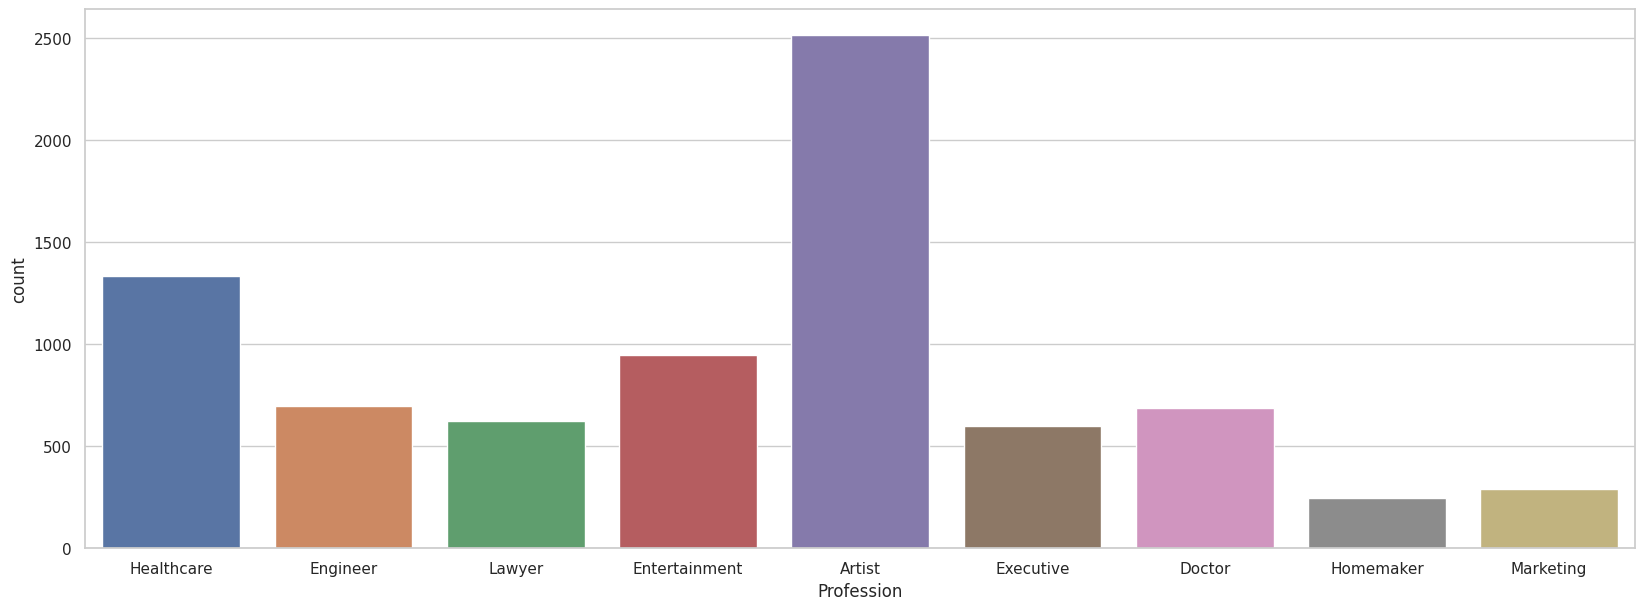

In [49]:
plt.figure(figsize=(20, 7))
sns.countplot(x=df.Profession)

<Axes: xlabel='Age', ylabel='count'>

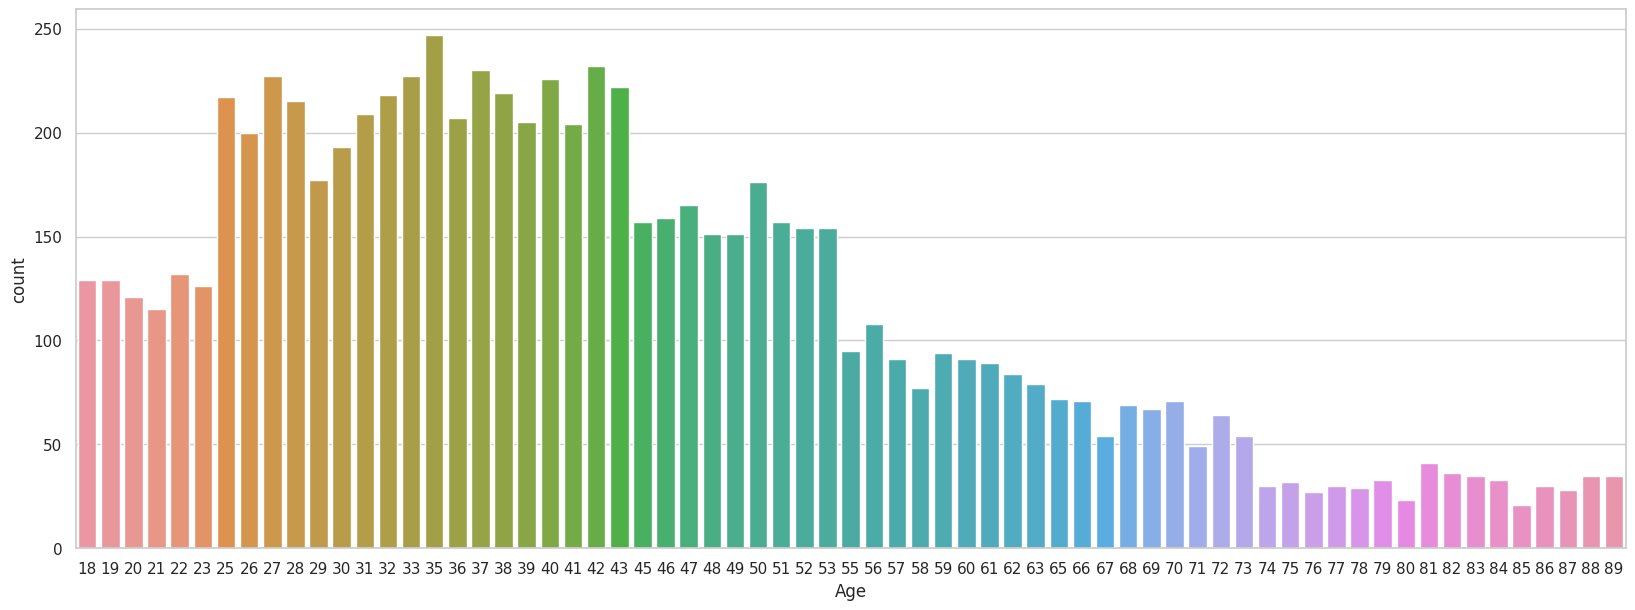

In [50]:
plt.figure(figsize=(20, 7))
sns.countplot(x=df[df.Ever_Married.notna()].Age)

## **Убираем пропуски**

In [51]:
str_columns = []
for str_col in df.columns:

    if df[str_col].dtype == 'object':
        str_columns.append(str_col)
        
        print(f'--{str_col}--')
        print(df[str_col].value_counts())
        print()

--Gender--
Male      4417
Female    3651
Name: Gender, dtype: int64

--Ever_Married--
Yes    4643
No     3285
Name: Ever_Married, dtype: int64

--Graduated--
Yes    4968
No     3022
Name: Graduated, dtype: int64

--Profession--
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

--Spending_Score--
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

--Var_1--
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64



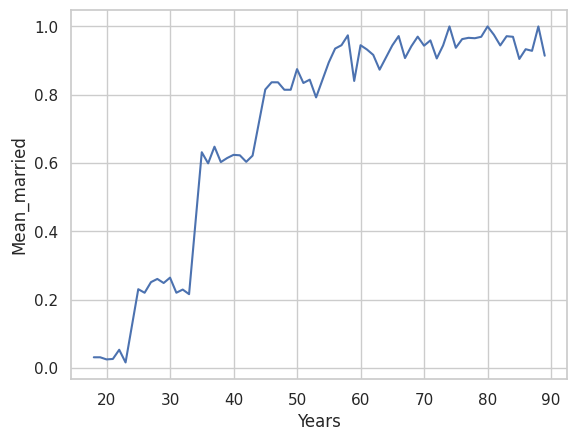

In [52]:
df_temp = df.replace({'Ever_Married': {'No': 0, 'Yes': 1}})
age_married_table = df_temp.groupby('Age')['Ever_Married'].mean()

plt.plot(age_married_table.index, age_married_table.values)
plt.xlabel('Years')
plt.ylabel('Mean_married')

array_yn = ['No', 'Yes']
for row in range(df_temp.shape[0]):
    if df_temp.loc[row, 'Ever_Married'] not in array_yn:
        df_temp.loc[row, 'Ever_Married'] = array_yn[round(age_married_table.loc[df.iloc[row].Age] + 0.0001)]

df = df_temp

<ipython-input-53-5507d51e5e6d>:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  df_temp.loc[row, 'Graduated'] = array_yn[age_graduated_table.loc[df.iloc[row].Age] > 0.5]


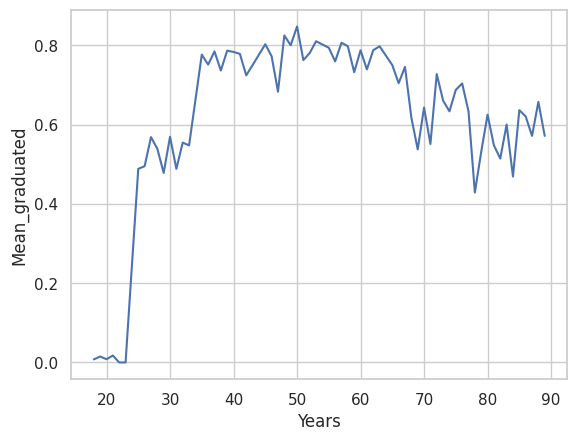

In [53]:
df_temp = df.replace({'Graduated': {'No': 0, 'Yes': 1}})
age_graduated_table = df_temp.groupby('Age')['Graduated'].mean()

plt.plot(age_graduated_table.index, age_graduated_table.values)
plt.xlabel('Years')
plt.ylabel('Mean_graduated')

array_yn = ['No', 'Yes']
for row in range(df.shape[0]):
    if df_temp.loc[row, 'Graduated'] not in array_yn:
        df_temp.loc[row, 'Graduated'] = array_yn[age_graduated_table.loc[df.iloc[row].Age] > 0.5]

df = df_temp

In [54]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [55]:
from sklearn.impute import KNNImputer

knnimp = KNNImputer(n_neighbors=5)

df['Work_Experience'] = np.round(knnimp.fit_transform(df[['Work_Experience']]))
df['Family_Size'] = np.round(knnimp.fit_transform(df[['Family_Size']]))

# df.fillna({'Work_Experience':'0.0','Family_Size':'1'}, inplace = True)

In [56]:
for col in ['Profession', 'Var_1']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [57]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,3.0,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,3.0,High,6.0,Cat_6


In [58]:
np.allclose(df.isna().sum(), 0)

True

In [59]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

## **OneHotEncoder & StandardScaler**

In [60]:
from sklearn.preprocessing import OneHotEncoder

ohe_cat = OneHotEncoder()

df_ohe_cat = pd.DataFrame(ohe_cat.fit_transform(df[str_columns].values).toarray())

new_columns = []
for col in str_columns:
    for val in df[col].unique():
        new_columns.append(col + '_' + str(val))

for ind, new_col in enumerate(new_columns):
    df[new_col] = df_ohe_cat.iloc[:, ind]
for col in str_columns:
    df = df.drop(col, axis=1)

In [61]:
df.head()

,ID,Age,Work_Experience,Family_Size,Gender_Male,Gender_Female,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_Low,Spending_Score_Average,Spending_Score_High,Var_1_Cat_4,Var_1_Cat_6,Var_1_Cat_7,Var_1_Cat_3,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_5
0,462809,22,1.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,462643,38,3.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,466315,67,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461735,67,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,462669,40,3.0,6.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X = std.fit_transform(df.iloc[:, 1:])

## **Визуализация**

In [63]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
pca_x = model.fit_transform(X)

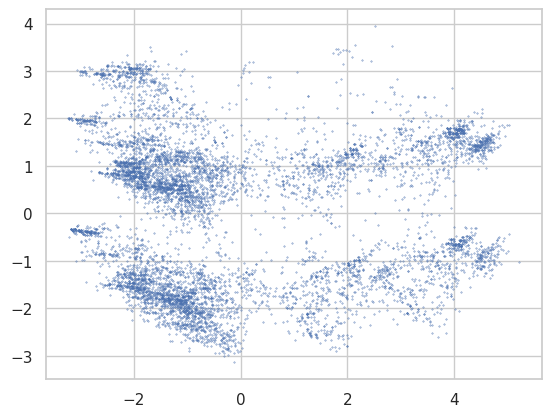

In [64]:
plt.scatter(pca_x[:, 0], pca_x[:, 1], s=0.1);

## **Анализ количества кластеров**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

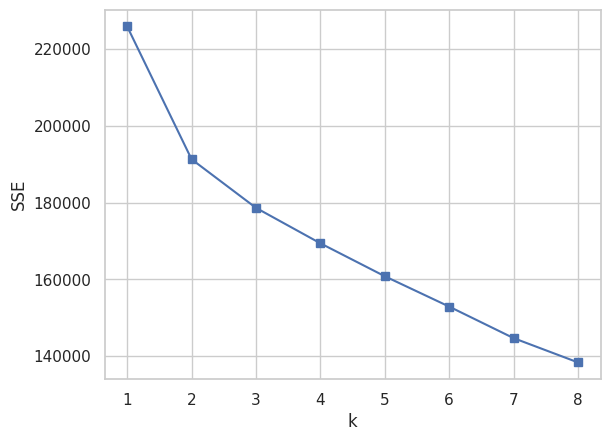

In [65]:
# метод локтя
from sklearn.cluster import KMeans

SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

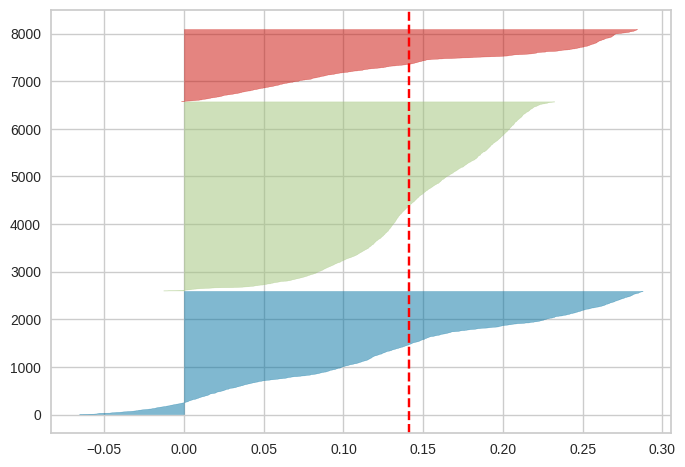

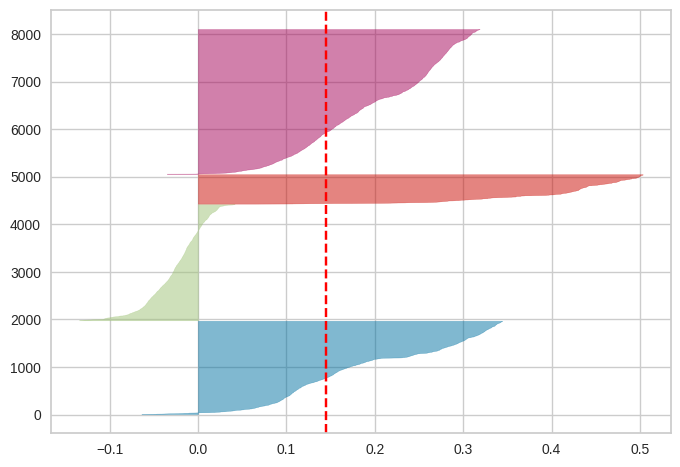

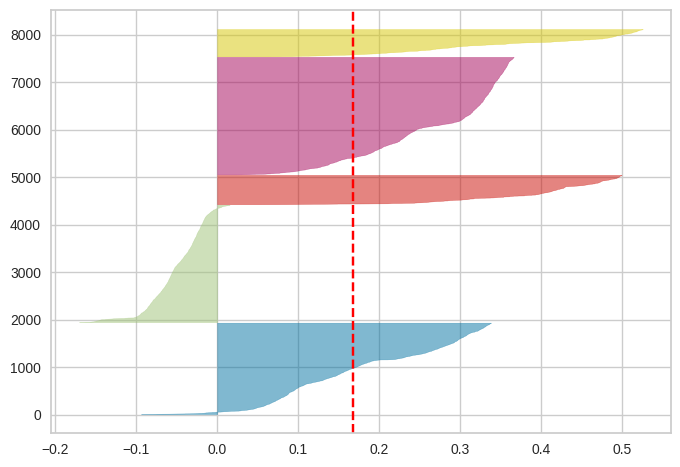

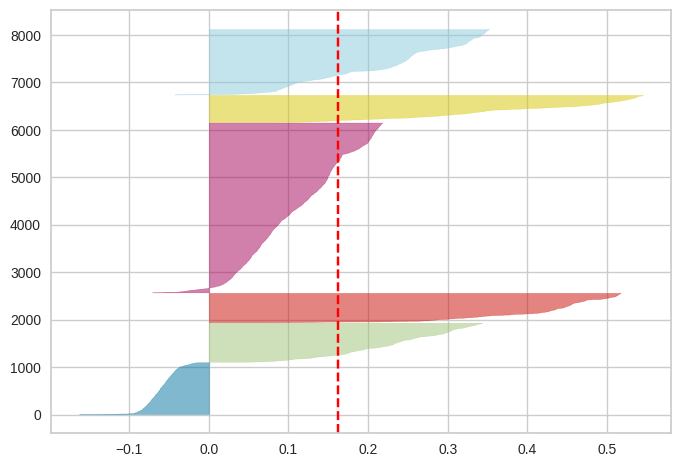

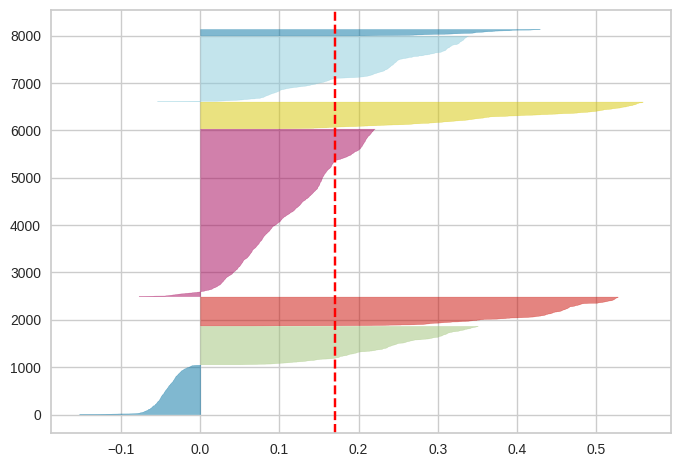

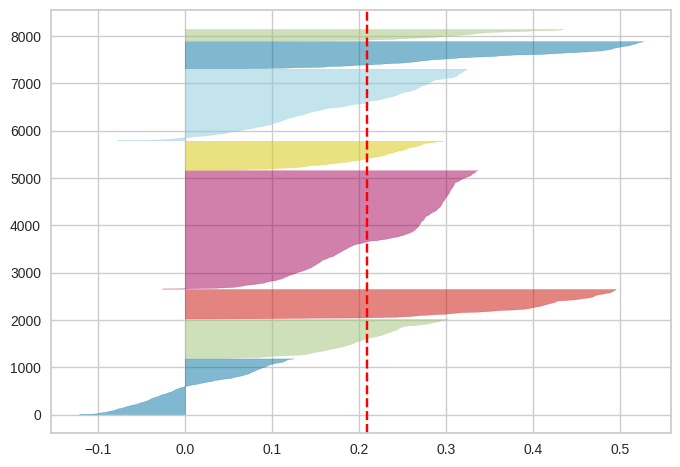

In [66]:
from yellowbrick.cluster import SilhouetteVisualizer

# fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(3,9):
    fig, ax1 = plt.subplots(1, 1)

    km = KMeans(n_clusters=i, random_state=42, n_init='auto')

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax1)
    visualizer.fit(X)

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

for n_clusters in range(2, 9):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

#     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        pca_x[:, 0], pca_x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    from sklearn.decomposition import PCA
    model = PCA(n_components=2)
    pca_centr = model.fit_transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        pca_centr[:, 0],
        pca_centr[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(pca_centr):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## **Выбор модели**

In [68]:
from sklearn.cluster import AgglomerativeClustering 

n_cluster = 4
Agg_hc = AgglomerativeClustering(n_clusters = n_cluster, affinity = 'euclidean', linkage = 'ward')
y = Agg_hc.fit_predict(X)

# 0.37630

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [69]:
y_color = y

In [70]:
model = PCA(n_components=3)
pca_x = model.fit_transform(X)

x, y, z = pca_x[:, 0], pca_x[:, 1], pca_x[:, 2]

import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=y_color,
        opacity=0.8
    )
)])
fig.show()

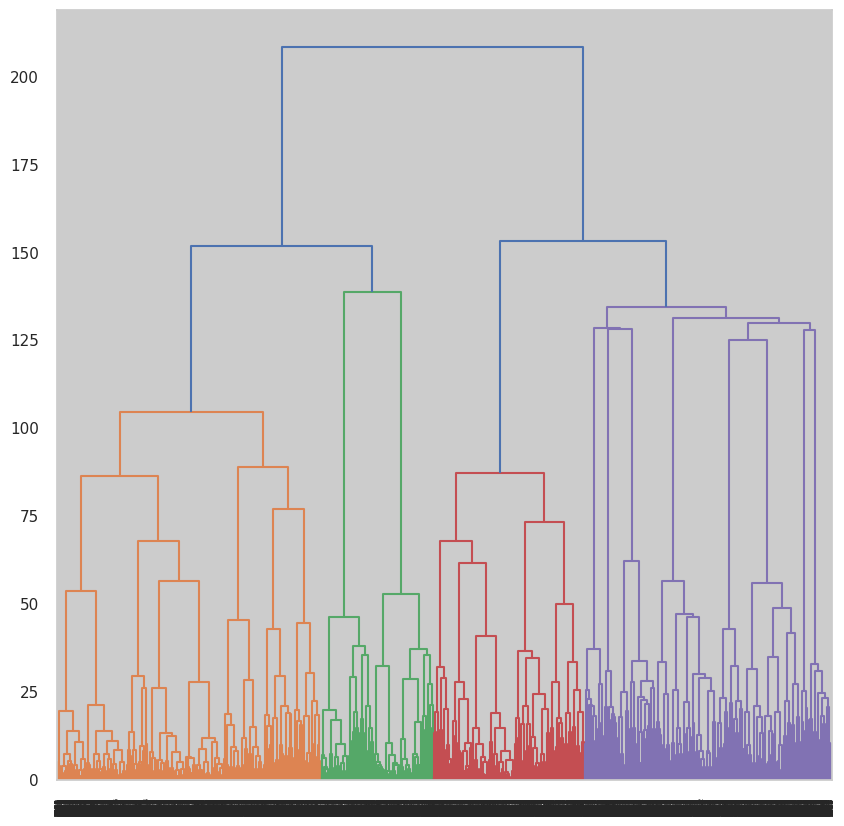

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# матрица расстояний
Z = linkage(X, metric='euclidean', method='ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=20).fit(X)
y = kmeans.labels_

# 0.33267

In [ ]:
y_color = y

In [71]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=300)

dbscan.fit(X)
y = dbscan.labels_

In [72]:
pd.Series(y).value_counts()

-1    6111
 1     789
 0     732
 2     436
dtype: int64

## **Сохранение результатов**

In [ ]:
ans = pd.DataFrame()

ans['ID'] = df.ID
dict_right_ans = {}
index_ans = 1
for item in y:
    if not dict_right_ans.get(item):
        dict_right_ans[item] = index_ans
        index_ans += 1

ans['Segmentation'] = list(map(lambda x : dict_right_ans[x], y))
ans.head()

,ID,Segmentation
0,462809,1
1,462643,2
2,466315,2
3,461735,3
4,462669,3


In [ ]:
ans.to_csv('/content/gdrive/MyDrive/ML_misis_4sem/hw_04/ans.csv', index=False)